# Informações sobre a base de dados
---
## A base de dados foi retirada dos datasets do kaggle disponível no seguinte [link](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset). E consiste em uma base de dados com caracteristicas do coração de indivíduos que podem indicar se a pessoa possui uma alta(1) ou baixa(0) chance de ter um ataque Cardíaco.
# **Atributos:**
* age: Idade do paciente; 
* sex: Gênero do paciente:
    1: Masculino
    0: Feminino
* exng: Angina induzida por exercício;
* caa: Número de veias principais coloridas por fluoroscopia;
* cp : Tipo de dor sentida pelo paciente

    1: Angina tipica;
    
    2: Angina atípica;
    
    3: Dor diferente angina;
    
    0: Asintomático.

* trtbps : pressão do sangue em descanso

* chol : colesterol em mg/dl 

* fbs : (Açucar no sangue em jejum > 120 mg/dl) (1 = Verdadeiro; 0 = Falso)

* restecg : Resultado do eletrocardiograma em repouso

    0: Normal

    1: Possui anormalidade nas ondas 
    
    2: Provável hipertrofia ventricular esquerda  

* thalachh : Frequência cardíaca máxima acançada
* Oldpeak : depressão da escapula induzida pelo exercício, em relação ao descanso
	
* slp : inclinação escapular no pico do exercício
         0: inclinação ascendente
         1: plano
         2: inclinação descendente

* Thall : Taxa de Thalassemia
    0: Erro
    1: Normal
    2: Defeito fixo
    3: Defeito reversível

* output : 
    
    0: Pouca chance de um ataque cardíaco;
    
    1: Chance alta de um ataque cardíaco. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv('https://raw.githubusercontent.com/diego2017003/knn_treeClassifier/main/heart.csv?token=AHICD55RZU4G53PRUPRVB3DA4HQCS')
dados.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dados.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
dados_tratados = dados.copy()
#dados_tratados.restecg.replace({0:'Normal',1:'Possui_anormalidade',2:'Provável_hipertrofia'}, inplace=True)
#dados_tratados.cp.replace({1:'Angina_tipica',2:'Angina_atipica',3:'Não_Angina',0:'Assintomatico'}, inplace=True)
#dados_tratados.slp.replace({0:'Descendente',1:'Plana',2:'Ascendente'}, inplace=True)
#dados_tratados = pd.get_dummies(dados_originais_tratados , columns=['restecg','cp'] , prefix=['restecg_','cp_'])
#dados_tratados.describe()

In [ ]:
dados.drop(columns=['output']).mean()

age          54.366337
sex           0.683168
cp            0.966997
trtbps      131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalachh    149.646865
exng          0.326733
oldpeak       1.039604
slp           1.399340
caa           0.729373
thall         2.313531
dtype: float64

In [ ]:
dados.drop(columns=['output']).std()

age          9.082101
sex          0.466011
cp           1.032052
trtbps      17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalachh    22.905161
exng         0.469794
oldpeak      1.161075
slp          0.616226
caa          1.022606
thall        0.612277
dtype: float64

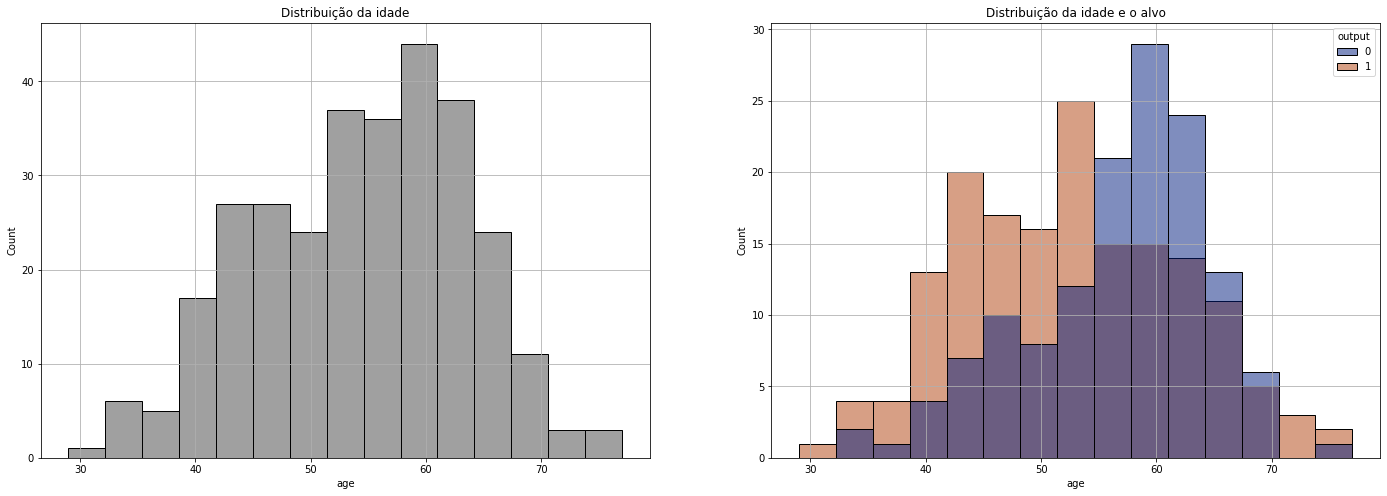

In [ ]:
#visualização da idade
plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.grid()
sns.histplot(data=dados,x='age',bins=15,color='Gray').set_title("Distribuição da idade")
#visualização da idade
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=dados,x='age',hue='output',bins=15,palette='dark').set_title("Distribuição da idade e o alvo")
plt.show()

Text(0.5, 1.0, 'Boxplot Saída X Idade')

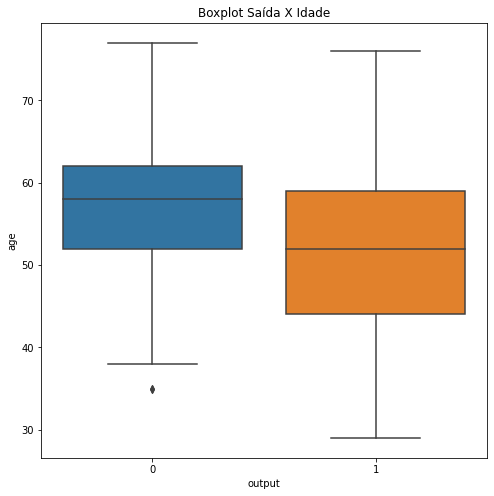

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=dados_tratados,y='age',x='output').set_title("Boxplot Saída X Idade")

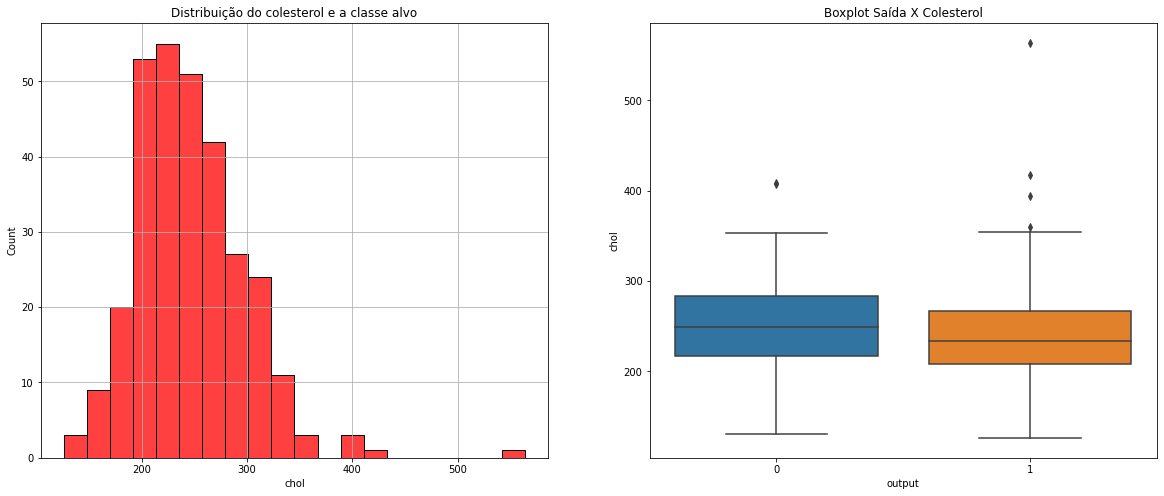

In [ ]:
#visualização do cholesterol
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.grid()
sns.histplot(data=dados_tratados,x='chol',bins=20,palette='bright',color='Red').set_title("Distribuição do colesterol e a classe alvo")
plt.subplot(1,2,2)
sns.boxplot(data=dados_tratados,y='chol',x='output').set_title("Boxplot Saída X Colesterol")
plt.show()

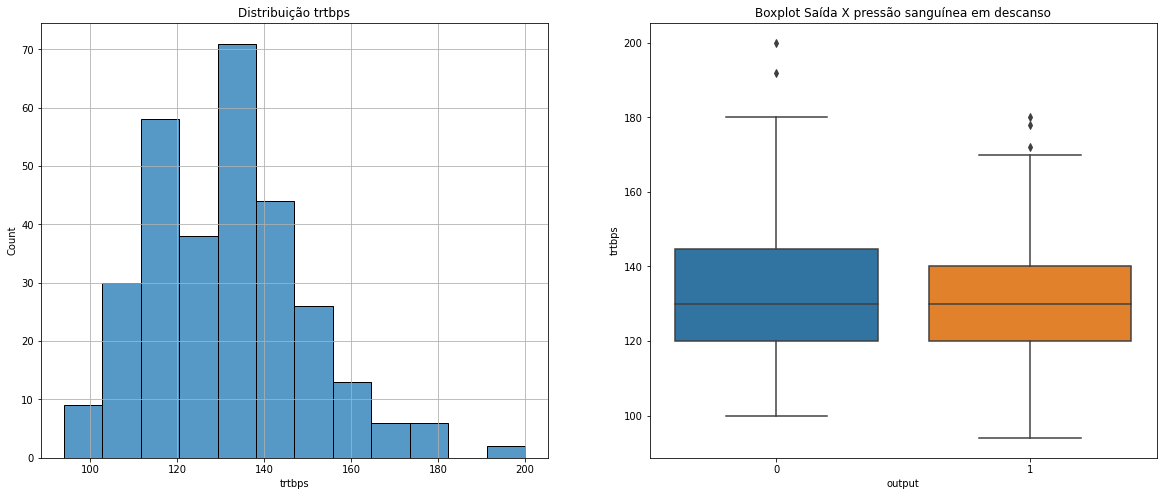

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.grid()
sns.histplot(data=dados_tratados,x='trtbps',bins=12).set_title("Distribuição trtbps")
plt.subplot(1,2,2)
sns.boxplot(data=dados_tratados,y='trtbps',x='output').set_title("Boxplot Saída X pressão sanguínea em descanso")
plt.show()

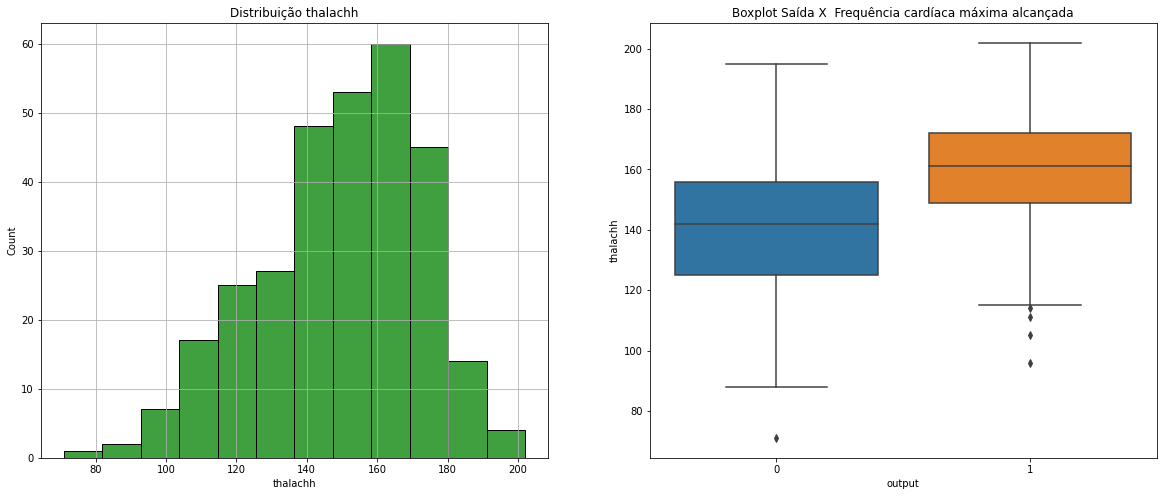

In [ ]:
#visualização da thalach
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.grid()
sns.histplot(data=dados_tratados,x='thalachh',bins=12,color='Green').set_title("Distribuição thalachh")
plt.subplot(1,2,2)
sns.boxplot(data=dados_tratados,y='thalachh',x='output').set_title("Boxplot Saída X  Frequência cardíaca máxima alcançada")
plt.show()

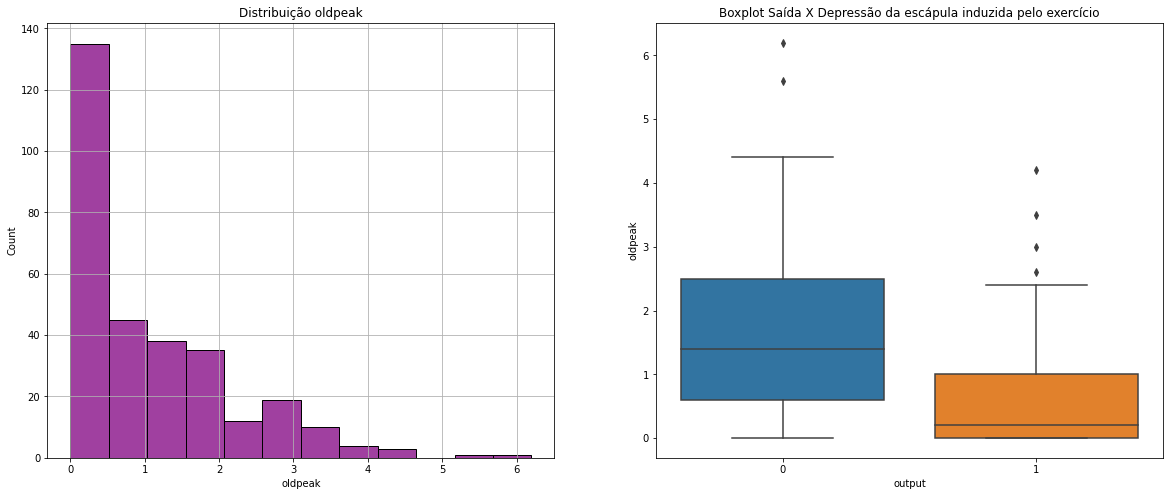

In [ ]:
#visualização do oldpeak
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.grid()
sns.histplot(data=dados_tratados,x='oldpeak',bins=12,color='Purple',palette='bright').set_title("Distribuição oldpeak")
plt.subplot(1,2,2)
sns.boxplot(data=dados_tratados,y='oldpeak',x='output').set_title("Boxplot Saída X Depressão da escápula induzida pelo exercício")
plt.show()

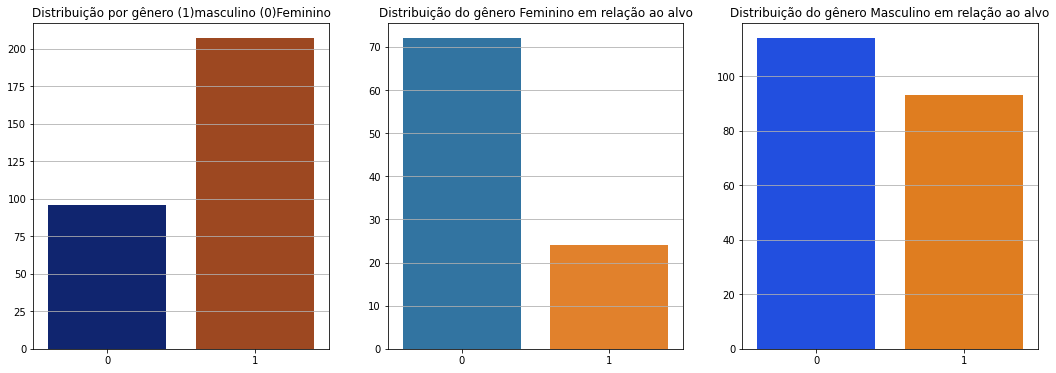

In [ ]:
#visualização da dsitribuição por gênero
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.grid()
x = dados_tratados.sex.value_counts()
sns.barplot(x=x.keys(),y=x.values,palette='dark').set_title("Distribuição por gênero (1)masculino (0)Feminino")
#visualização por gênero e a chance de ataque cardíaco
plt.subplot(1,3,2)
plt.grid()
x = dados_tratados.loc[dados_tratados.sex==0,['output']]
x1 = x.value_counts()
sns.barplot(data=x1).set_title("Distribuição do gênero Feminino em relação ao alvo")
plt.subplot(1,3,3)
plt.grid()
x = dados_tratados.loc[dados_tratados.sex==1,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do gênero Masculino em relação ao alvo")
plt.show()

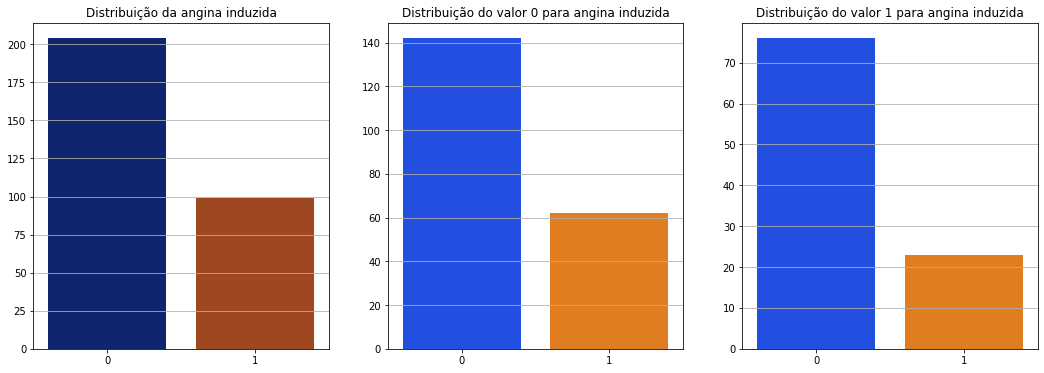

In [ ]:
#visualização da distribuição por exng
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.grid()
x = dados_tratados.exng.value_counts()
sns.barplot(x=x.keys(),y=x.values,color='Gray',palette='dark').set_title("Distribuição da angina induzida")
#visualização por valor positivo e negativo da anginina e a chance de ataque cardíaco
plt.subplot(1,3,2)
plt.grid()
x = dados_tratados.loc[dados_tratados.exng==0,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do valor 0 para angina induzida")
plt.subplot(1,3,3)
plt.grid()
x = dados_tratados.loc[dados_tratados.exng==1,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do valor 1 para angina induzida")
plt.show()

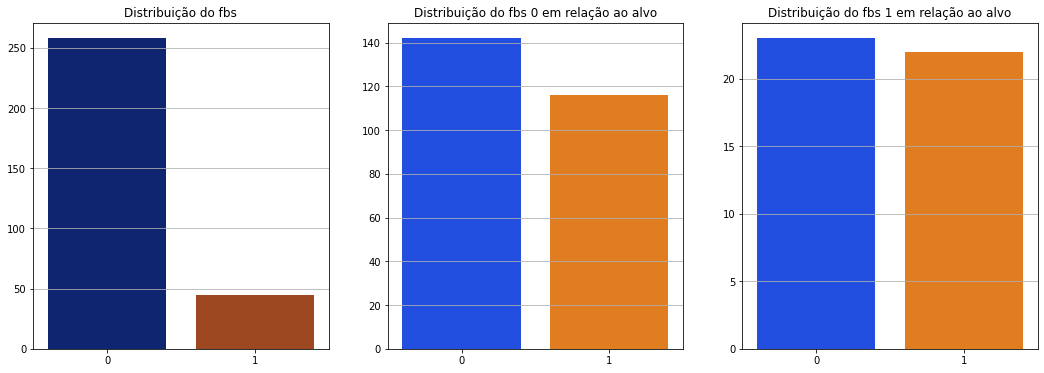

In [ ]:
#visualização por fbs e a chance de ataque cardíaco
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.grid()
x = dados_tratados.fbs.value_counts()
sns.barplot(x=x.keys(),y=x.values,palette='dark').set_title("Distribuição do fbs")
#visualização por fbs e a chance de ataque cardíaco
plt.subplot(1,3,2)
plt.grid()
x = dados_tratados.loc[dados_tratados.fbs==0,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do fbs 0 em relação ao alvo")
#visualização por fbs e a chance de ataque cardíaco
plt.subplot(1,3,3)
plt.grid()
x = dados_tratados.loc[dados_tratados.fbs==1,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do fbs 1 em relação ao alvo")
plt.show()

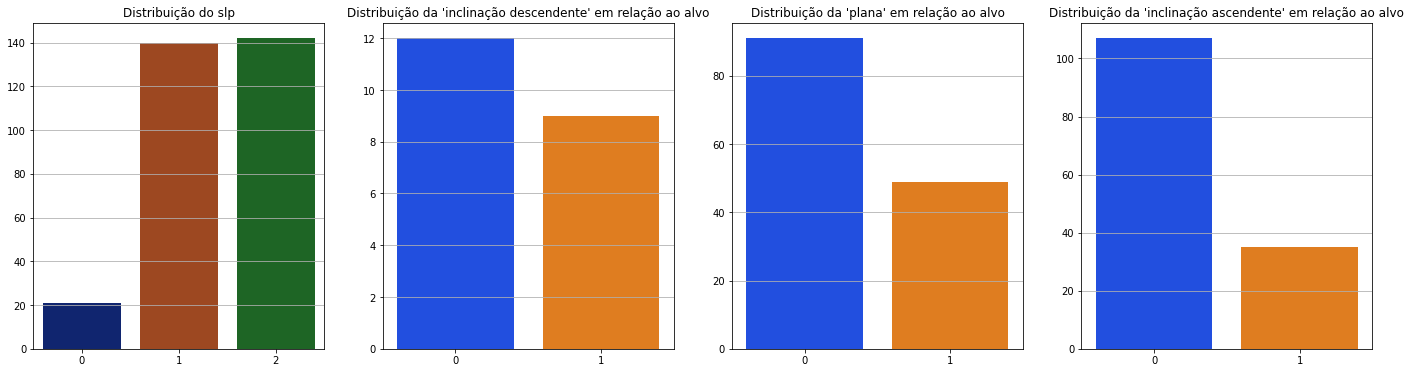

In [ ]:
#visualização por slp 
plt.figure(figsize=(24,6))
plt.subplot(1,4,1)
plt.grid()
x = dados_tratados.slp.value_counts()
sns.barplot(x=x.keys(),y=x.values,palette='dark').set_title("Distribuição do slp")
#visualização por slp 0 e a chance de ataque cardíaco
plt.subplot(1,4,2)
plt.grid()
x = dados_tratados.loc[dados_tratados.slp==0,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição da 'inclinação descendente' em relação ao alvo")
#visualização por slp 1 e a chance de ataque cardíaco
plt.subplot(1,4,3)
plt.grid()
x = dados_tratados.loc[dados_tratados.slp==1,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição da 'plana' em relação ao alvo")
#visualização por slp 2 e a chance de ataque cardíaco
plt.subplot(1,4,4)
plt.grid()
x = dados_tratados.loc[dados_tratados.slp==2,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição da 'inclinação ascendente' em relação ao alvo")
plt.show()

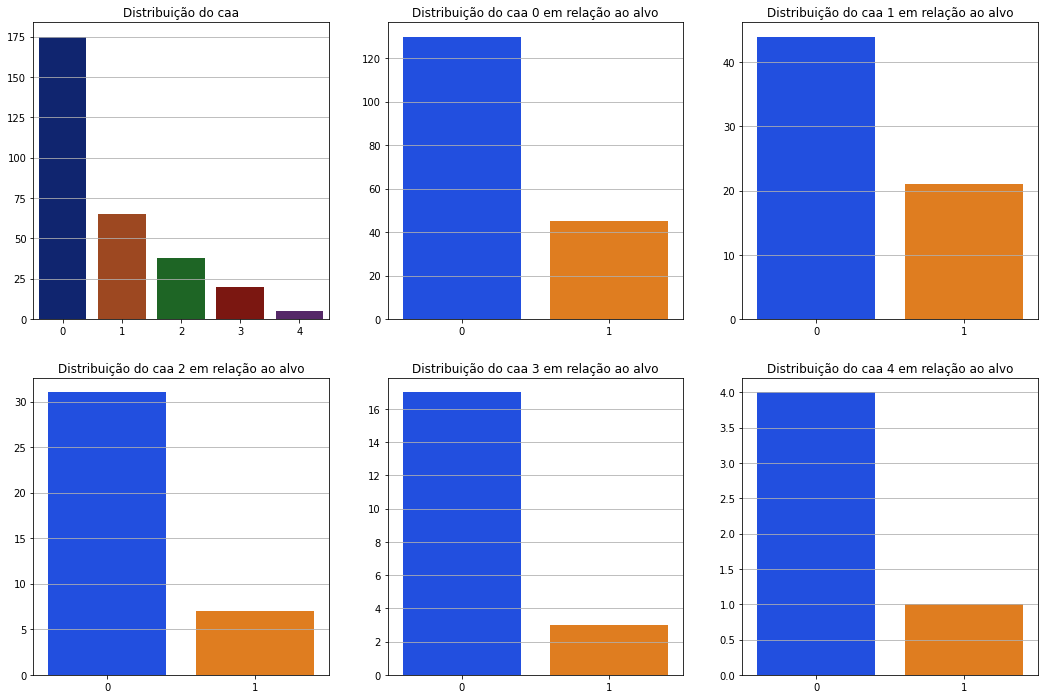

In [ ]:
#visualização por 	caa  
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
plt.grid()
x = dados_tratados.caa.value_counts()
sns.barplot(x=x.keys(),y=x.values,palette='dark').set_title("Distribuição do caa")
#visualização por caa 0 e a chance de ataque cardíaco
plt.subplot(2,3,2)
plt.grid()
x = dados_tratados.loc[dados_tratados.caa ==0,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do caa 0 em relação ao alvo")
#visualização por caa 1 e a chance de ataque cardíaco
plt.subplot(2,3,3)
plt.grid()
x = dados_tratados.loc[dados_tratados.caa==1,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do caa 1 em relação ao alvo")
#visualização por caa 2 e a chance de ataque cardíaco
plt.subplot(2,3,4)
plt.grid()
x = dados_tratados.loc[dados_tratados.caa==2,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do caa 2 em relação ao alvo")
#visualização por caa 2 e a chance de ataque cardíaco
plt.subplot(2,3,5)
plt.grid()
x = dados_tratados.loc[dados_tratados.caa==3,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do caa 3 em relação ao alvo")
#visualização por caa 2 e a chance de ataque cardíaco
plt.subplot(2,3,6)
plt.grid()
x = dados_tratados.loc[dados_tratados.caa==4,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do caa 4 em relação ao alvo")
plt.show()

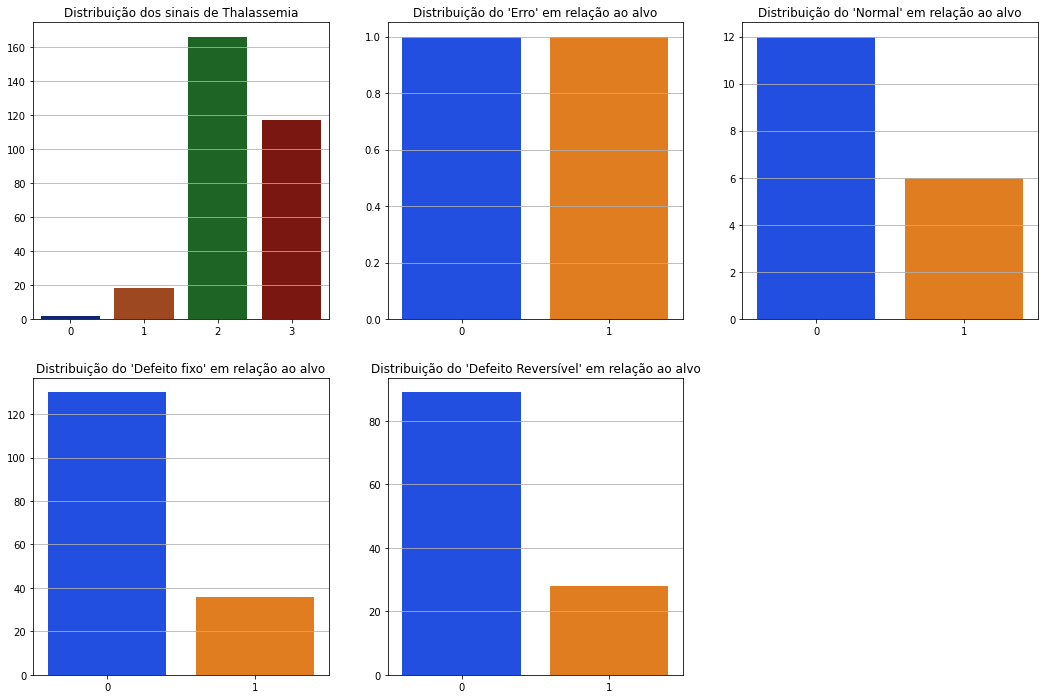

In [ ]:
#visualização por thall  
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
plt.grid()
x = dados_tratados.thall.value_counts()
sns.barplot(x=x.keys(),y=x.values,palette='dark').set_title("Distribuição dos sinais de Thalassemia")
#visualização por thall 0 e a chance de ataque cardíaco
plt.subplot(2,3,2)
plt.grid()
x = dados_tratados.loc[dados_tratados.thall ==0,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do 'Erro' em relação ao alvo")
#visualização por thall 1 e a chance de ataque cardíaco
plt.subplot(2,3,3)
plt.grid()
x = dados_tratados.loc[dados_tratados.thall==1,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do 'Normal' em relação ao alvo")
#visualização por caa 2 e a chance de ataque cardíaco
plt.subplot(2,3,4)
plt.grid()
x = dados_tratados.loc[dados_tratados.thall==2,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do 'Defeito fixo' em relação ao alvo")
#visualização por  e a chance de ataque cardíaco
plt.subplot(2,3,5)
plt.grid()
x = dados_tratados.loc[dados_tratados.thall==3,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do 'Defeito Reversível' em relação ao alvo")
plt.show()

Text(0.5, 1.0, "Distribuição do eletro 'Com possível hipertrófia ventricular esquerda' em relação ao alvo")

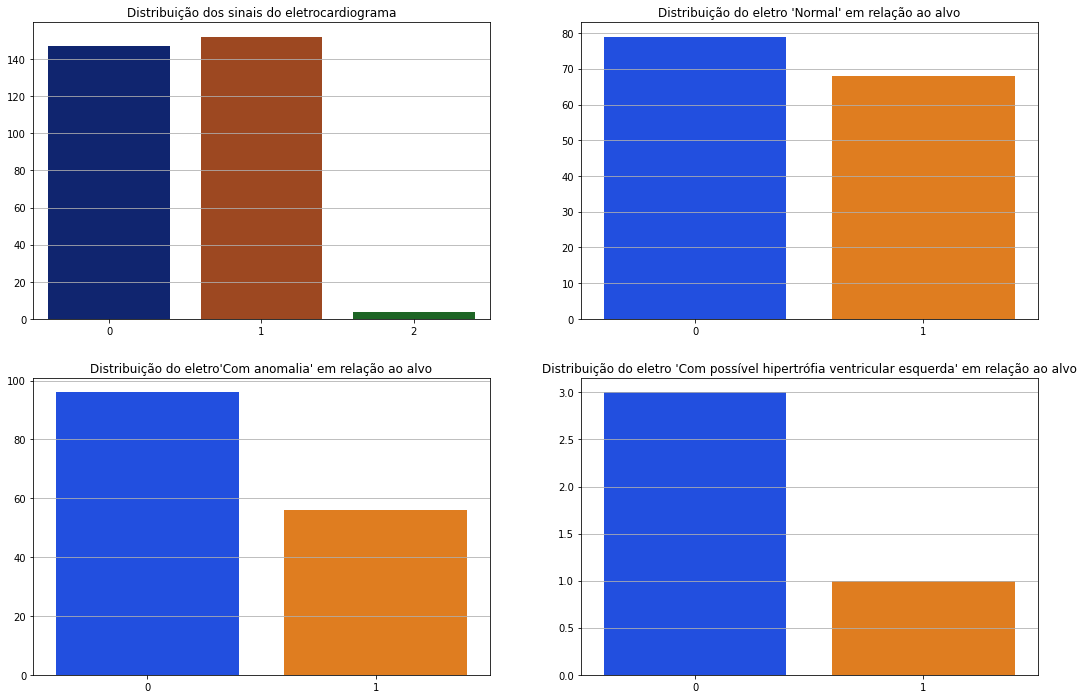

In [ ]:
#visualização por restecg  
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.grid()
x = dados_tratados.restecg.value_counts()
sns.barplot(x=x.keys(),y=x.values,palette='dark').set_title("Distribuição dos sinais do eletrocardiograma")
#visualização por restecg 0 e a chance de ataque cardíaco
plt.subplot(2,2,2)
plt.grid()
x = dados_tratados.loc[dados_tratados.restecg ==0,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do eletro 'Normal' em relação ao alvo")
#visualização por restecg 1 e a chance de ataque cardíaco
plt.subplot(2,2,3)
plt.grid()
x = dados_tratados.loc[dados_tratados.restecg==1,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do eletro'Com anomalia' em relação ao alvo")
#visualização por restecg 2 e a chance de ataque cardíaco
plt.subplot(2,2,4)
plt.grid()
x = dados_tratados.loc[dados_tratados.restecg==2,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do eletro 'Com possível hipertrófia ventricular esquerda' em relação ao alvo")


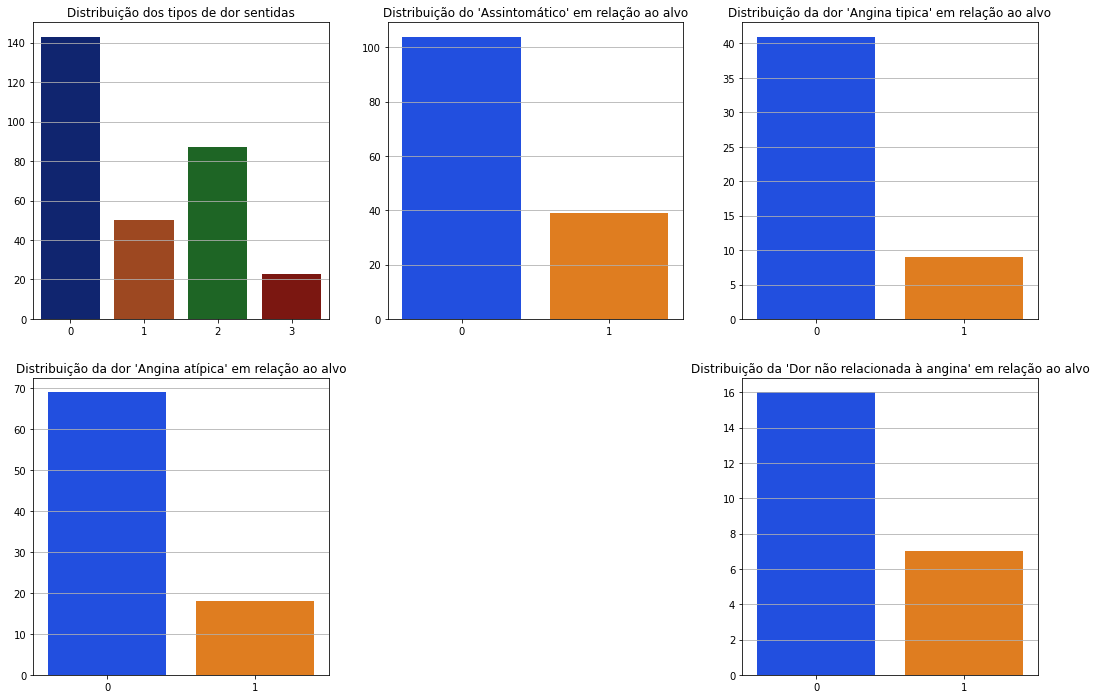

In [ ]:
#visualização por tipo da dor sentida 
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
plt.grid()
x = dados_tratados.cp.value_counts()
sns.barplot(x=x.keys(),y=x.values,palette='dark').set_title("Distribuição dos tipos de dor sentidas")
#visualização por cp 0 e a chance de ataque cardíaco
plt.subplot(2,3,2)
plt.grid()
x = dados_tratados.loc[dados_tratados.cp ==0,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição do 'Assintomático' em relação ao alvo")
#visualização por cp 1 e a chance de ataque cardíaco
plt.subplot(2,3,3)
plt.grid()
x = dados_tratados.loc[dados_tratados.cp==1,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição da dor 'Angina tipica' em relação ao alvo")
#visualização por cp 2 e a chance de ataque cardíaco
plt.subplot(2,3,4)
plt.grid()
x = dados_tratados.loc[dados_tratados.cp==2,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição da dor 'Angina atípica' em relação ao alvo")
#visualização por cp 3 a chance de ataque cardíaco
plt.subplot(2,3,6)
plt.grid()
x = dados_tratados.loc[dados_tratados.cp==3,['output']]
x1 = x.value_counts()
sns.barplot(data=x1,palette='bright').set_title("Distribuição da 'Dor não relacionada à angina' em relação ao alvo")
plt.show()

### Análise de Correlação com heatmap e scatterplot
---

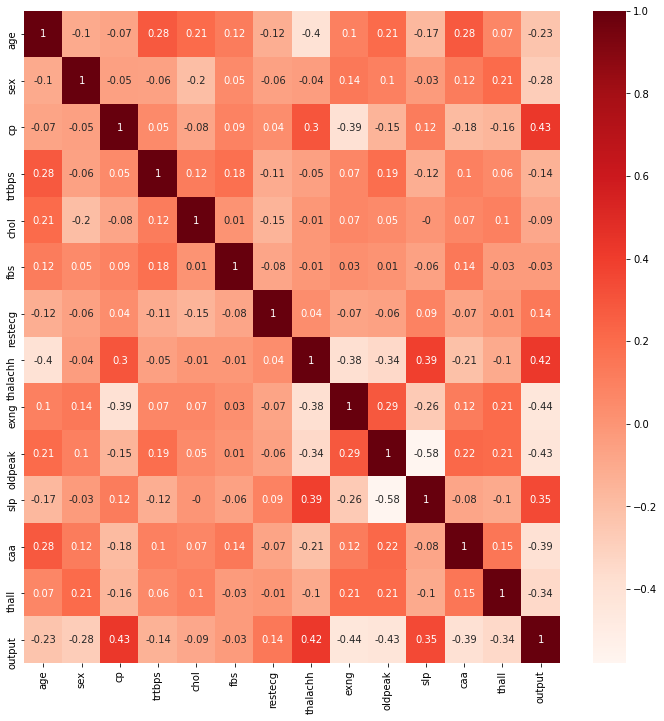

In [ ]:
plt.figure(figsize=(12,12))
corr = dados_tratados.corr()
sns.heatmap(data=corr.round(2),annot=True,cmap='Reds')

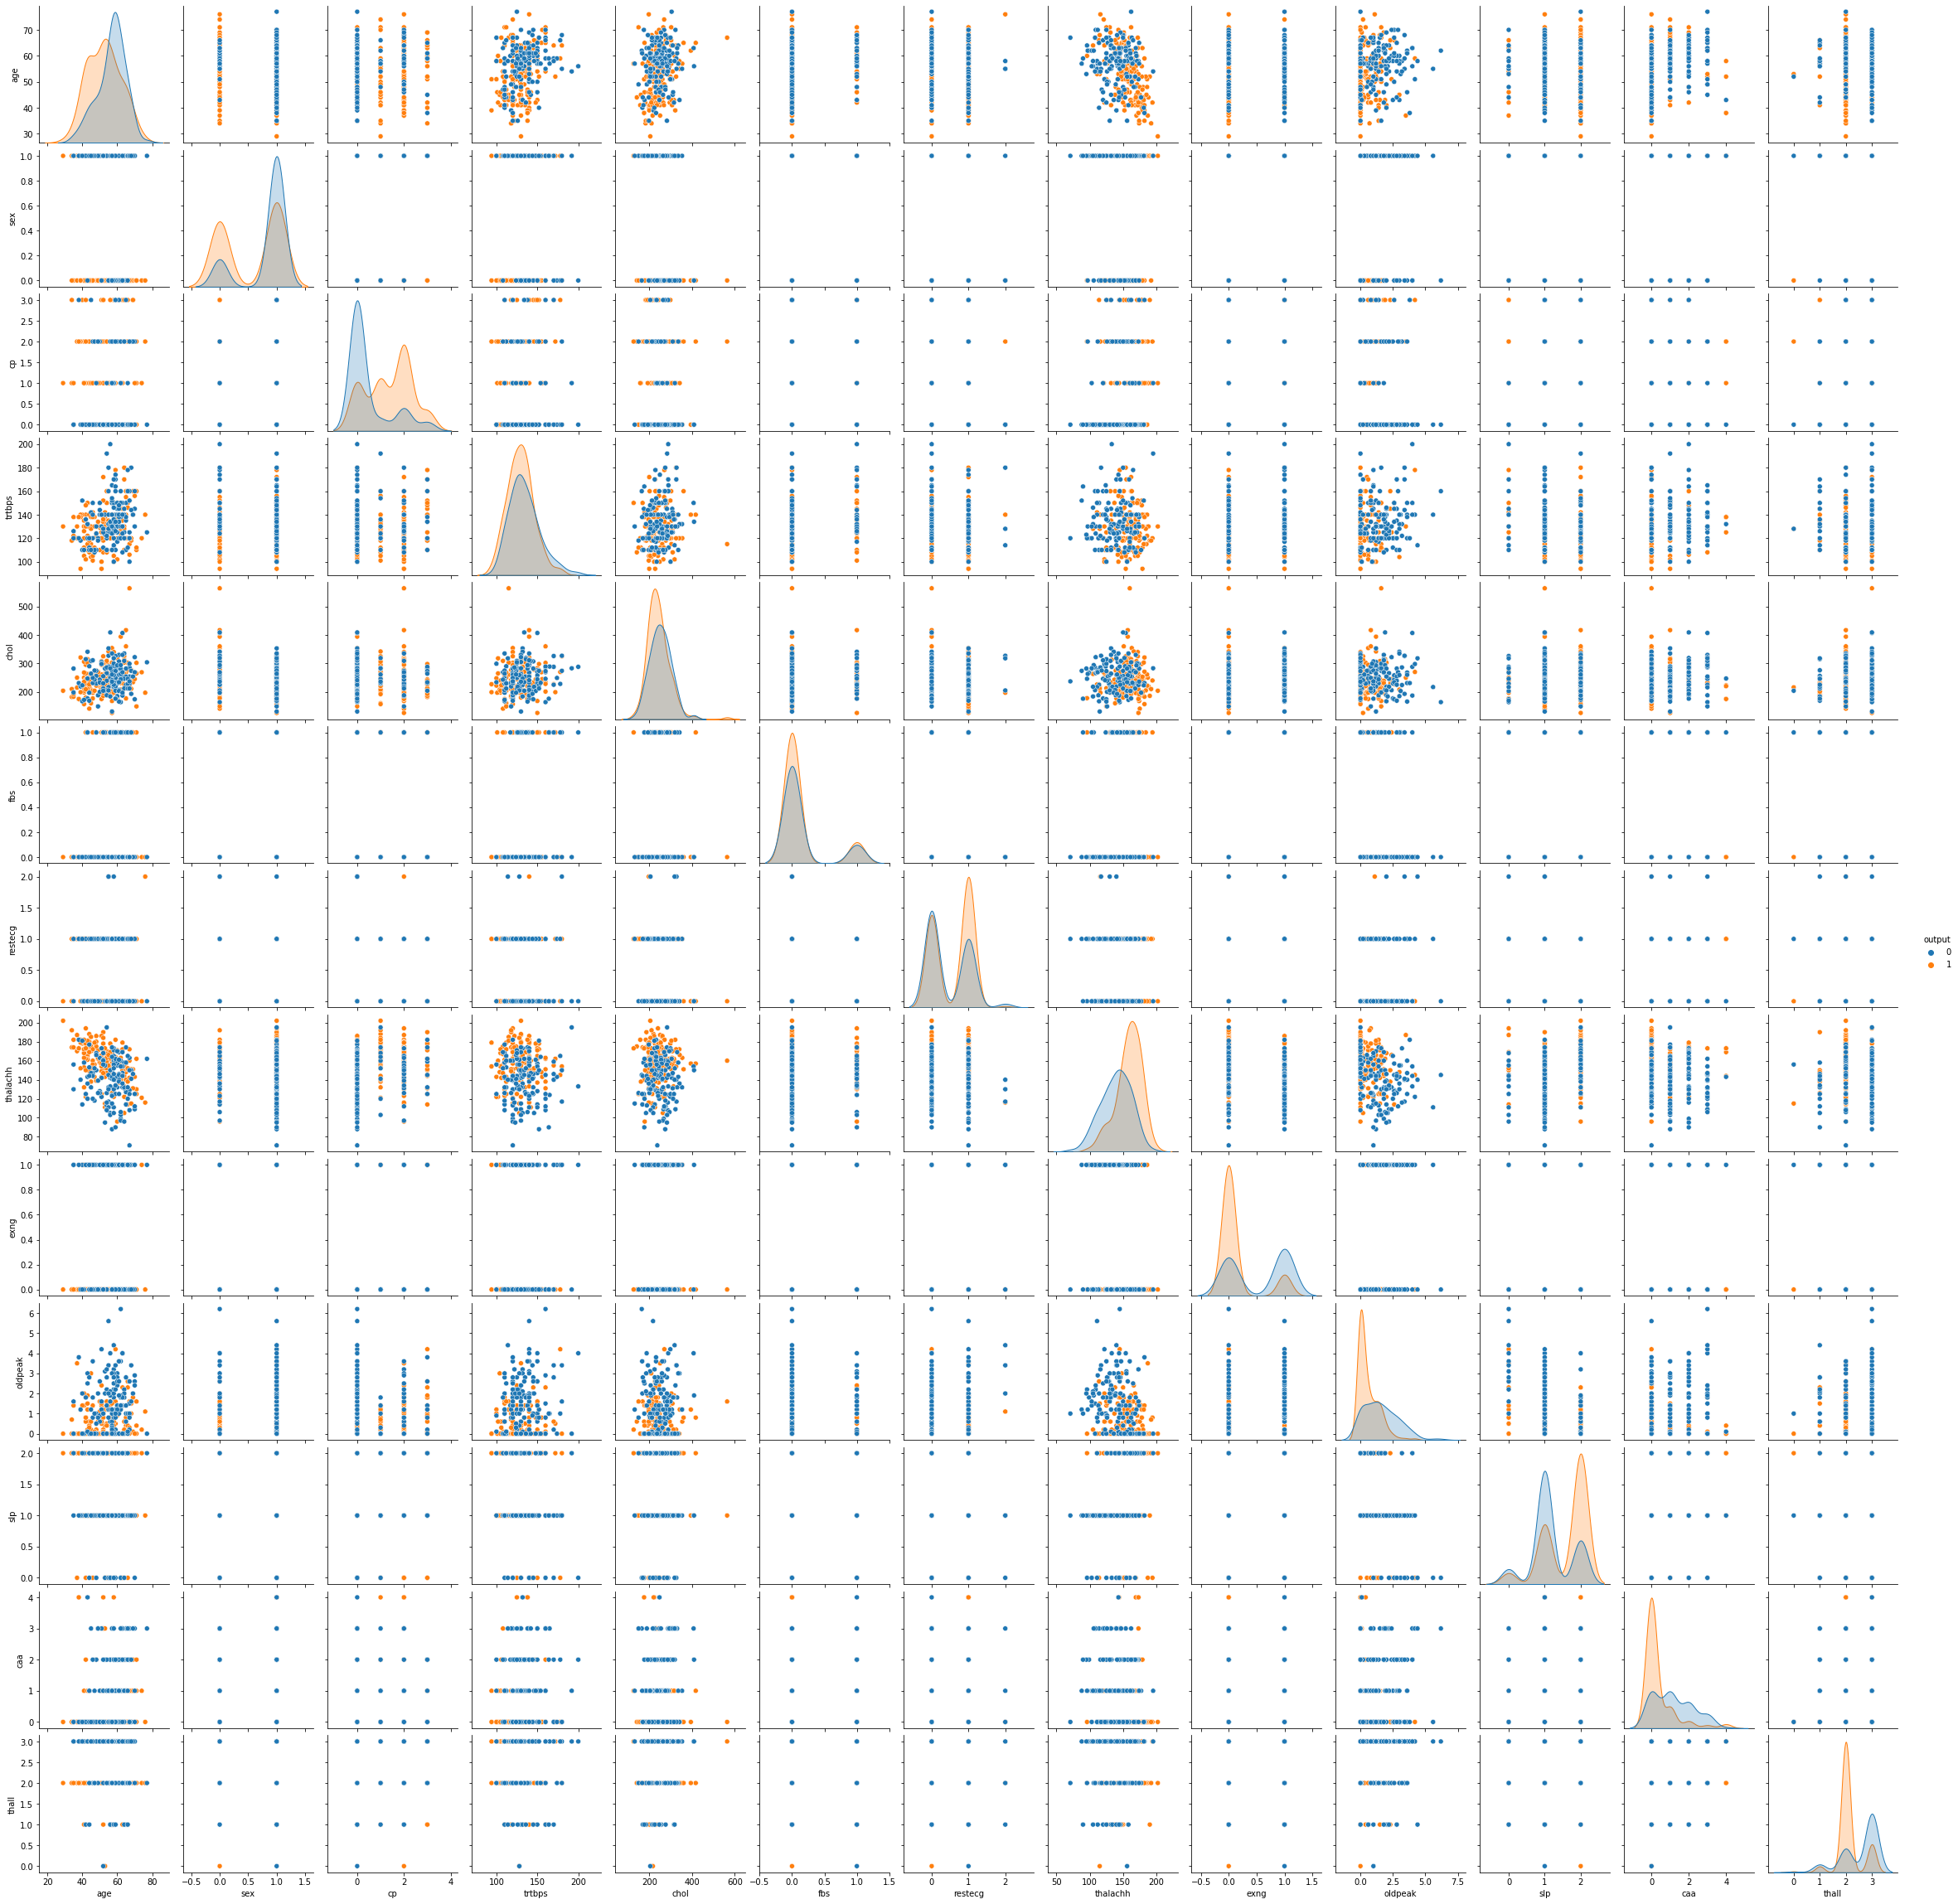

In [ ]:
sns.pairplot(data=dados_tratados,hue='output')

Como os atributos são divididos em dois grupos: numéricos e categóricos, estabeleceu-se o tipo numérico como padrão para conseguir uma leitura melhor dos dados.

In [ ]:
dados_originais_tratados = pd.get_dummies(dados_tratados , columns=['slp','thall','caa'] , prefix=['slp','thall','caa'])
dados_originais_tratados.restecg.replace({0:'Normal',1:'Possui_anormalidade',2:'Provável_hipertrofia'}, inplace=True)
dados_originais_tratados.cp.replace({1:'Angina_tipica',2:'Angina_atipica',3:'Não_Angina',0:'Assintomatico'}, inplace=True)
dados_originais_tratados = pd.get_dummies(dados_originais_tratados , columns=['restecg','cp'] , prefix=['restecg','cp'])

dados_originais_tratados.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3,caa_0,caa_1,caa_2,caa_3,caa_4,restecg_Normal,restecg_Possui_anormalidade,restecg_Provável_hipertrofia,cp_Angina_atipica,cp_Angina_tipica,cp_Assintomatico,cp_Não_Angina
0,63,1,145,233,1,150,0,2.3,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,37,1,130,250,0,187,0,3.5,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0


A normalização utilizada pelo sklearn tem por intuito reduzir a média para 0 e o desvio padrão para 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

In [ ]:
columns = ['age','trtbps','chol','thalachh','oldpeak']
dados_originais_normalizados = dados_originais_tratados.loc[:,columns]
dados_originais_normalizados = dados_originais_tratados.drop(columns=['output'])
mapper = DataFrameMapper([(dados_originais_normalizados.columns, StandardScaler())])
scaled_features = mapper.fit_transform(dados_originais_normalizados.copy())
scaled_features_df = pd.DataFrame(scaled_features, index=dados_originais_normalizados.index, columns=dados_originais_normalizados.columns)
dados_originais_normalizados = scaled_features_df.copy()
dados_originais_normalizados['sex'] = dados_originais_tratados['sex']
dados_originais_normalizados['fbs'] = dados_originais_tratados['fbs']
dados_originais_normalizados['exng'] = dados_originais_tratados['exng']
dados_originais_normalizados['restecg_Normal'] = dados_originais_tratados['restecg_Normal']
dados_originais_normalizados['restecg_Possui_anormalidades'] = dados_originais_tratados['restecg_Possui_anormalidade']
dados_originais_normalizados['restecg_Provável_hipertrofia'] = dados_originais_tratados['restecg_Provável_hipertrofia']
dados_originais_normalizados['cp_Angina_atipica'] = dados_originais_tratados['cp_Angina_atipica']
dados_originais_normalizados['cp_Angina_tipica'] = dados_originais_tratados['cp_Angina_tipica']
dados_originais_normalizados['cp_Assintomatico'] = dados_originais_tratados['cp_Assintomatico']
dados_originais_normalizados['cp_Não_Angina'] = dados_originais_tratados['cp_Não_Angina']
dados_originais_normalizados['slp_0'] = dados_originais_tratados['slp_0']
dados_originais_normalizados['slp_1'] = dados_originais_tratados['slp_1']
dados_originais_normalizados['slp_2'] = dados_originais_tratados['slp_2']
dados_originais_normalizados['thall_0'] = dados_originais_tratados['thall_0']
dados_originais_normalizados['thall_1'] = dados_originais_tratados['thall_1']
dados_originais_normalizados['thall_2'] = dados_originais_tratados['thall_2']
dados_originais_normalizados['thall_3'] = dados_originais_tratados['thall_3']
dados_originais_normalizados['caa_0'] = dados_originais_tratados['caa_0']
dados_originais_normalizados['caa_1'] = dados_originais_tratados['caa_1']
dados_originais_normalizados['caa_2'] = dados_originais_tratados['caa_2']
dados_originais_normalizados['caa_3'] = dados_originais_tratados['caa_3']
dados_originais_normalizados['caa_4'] = dados_originais_tratados['caa_4']
dados_originais_normalizados['output'] = dados_originais_tratados['output']
dados_originais_normalizados.describe().round(2)

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3,caa_0,caa_1,caa_2,caa_3,caa_4,restecg_Normal,restecg_Possui_anormalidade,restecg_Provável_hipertrofia,cp_Angina_atipica,cp_Angina_tipica,cp_Assintomatico,cp_Não_Angina,restecg_Possui_anormalidades,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.0,303.00,303.00,303.00,303.00,303.00,303.0,303.00
mean,0.00,0.68,-0.00,-0.00,0.15,-0.00,0.33,-0.00,0.07,0.46,0.47,0.01,0.06,0.55,0.39,0.58,0.21,0.13,0.07,0.02,0.49,0.0,0.01,0.29,0.17,0.47,0.08,0.5,0.54
std,1.00,0.47,1.00,1.00,0.36,1.00,0.47,1.00,0.25,0.50,0.50,0.08,0.24,0.50,0.49,0.49,0.41,0.33,0.25,0.13,0.50,1.0,0.11,0.45,0.37,0.50,0.27,0.5,0.50
min,-2.80,0.00,-2.15,-2.32,0.00,-3.44,0.00,-0.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
25%,-0.76,0.00,-0.66,-0.68,0.00,-0.71,0.00,-0.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
50%,0.07,1.00,-0.09,-0.12,0.00,0.15,0.00,-0.21,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00,0.00,1.0,1.00
75%,0.73,1.00,0.48,0.55,0.00,0.72,1.00,0.48,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.0,0.00,1.00,0.00,1.00,0.00,1.0,1.00
max,2.50,1.00,3.91,6.14,1.00,2.29,1.00,4.45,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00
